# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
import numpy as np

# K-Means, Hierarchical Clustering(階層分群)
from sklearn.cluster import KMeans, AgglomerativeClustering
# Principal Components Analysis(主成份分析)、t-SEN
from sklearn import decomposition, manifold


import matplotlib
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

### t-SEN 參數說明：

tSEN = manifold.TSNE( )
- n_components ( default = 2 )：降維後的空間維度  
- perpexity ( defaul = 30 ) : 降維過程中，考慮鄰近點的數量( 建議範圍 $ [ 5, 50 ] $ )   
- early_exaggeration ( default = 12 ) : 群簇間的距離，值愈大資料視覺化群簇的距離愈大
- random_state ( default : None ) : 隨機種子數  
- init ( default : 'random' ) : 初始化，常用設定 'pca' 為利用 PCA 進行初始化    
- learning_rate ( default = 200 ) : 學習率  
  
  
Reference :   
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html  
https://blog.csdn.net/hustqb/article/details/80628721  

##### t-SEN 模型參數設定

In [3]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE( n_components = 2, early_exaggeration = 15, random_state = 3, init = 'pca', learning_rate = 100 )

Computing t-SNE embedding


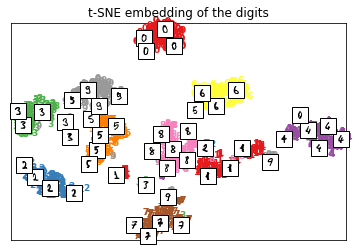

In [4]:
# Scale and visualize the embedding vectors
def plot_embedding( X, title = None ) :
    
    # 資料正規化
    x_min, x_max = np.min( X, 0 ), np.max( X, 0 )
    X = ( X - x_min ) / ( x_max - x_min )    

    plt.figure( )
    ax = plt.subplot( 111 )
    for i in range( X.shape[0] ) :
        plt.text( X[ i, 0 ], X[ i, 1 ], str( y[i] ),
                    color = plt.cm.Set1( y[i] / 10 ),
                    fontdict = { 'weight' : 'bold', 'size' : 9 } )

    if hasattr( offsetbox, 'AnnotationBbox' ):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array( [ [ 1., 1. ] ] )  # just something big
        for i in range( X.shape[0] ) :
            dist = np.sum( ( X[i] - shown_images ) ** 2, 1 )
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[ shown_images, [ X[i] ] ]
            imagebox = offsetbox.AnnotationBbox( offsetbox.OffsetImage( digits.images[i], cmap = plt.cm.gray_r ), X[i] )
            ax.add_artist( imagebox )
    plt.xticks( [] ), plt.yticks( [] )
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print( "Computing t-SNE embedding" )

X_tsne = tsne.fit_transform( X )

plot_embedding( X_tsne, "t-SNE embedding of the digits" )

plt.show( )